In [2]:
from cluster.utils import (
        make_clusters, 
        plot_clusters,
        plot_multipanel)

from cluster import KMeans

t_clusters, t_labels = make_clusters(k=4)



r [[-8.77918022  1.94806619]
 [ 3.11609125  0.77392459]
 [-4.53226424 -1.14602226]
 [ 2.85884628  0.15858896]] [[-8.77918022  1.94806619]
 [ 3.11609125  0.77392459]
 [-4.53226424 -1.14602226]
 [ 2.85884628  0.15858896]]


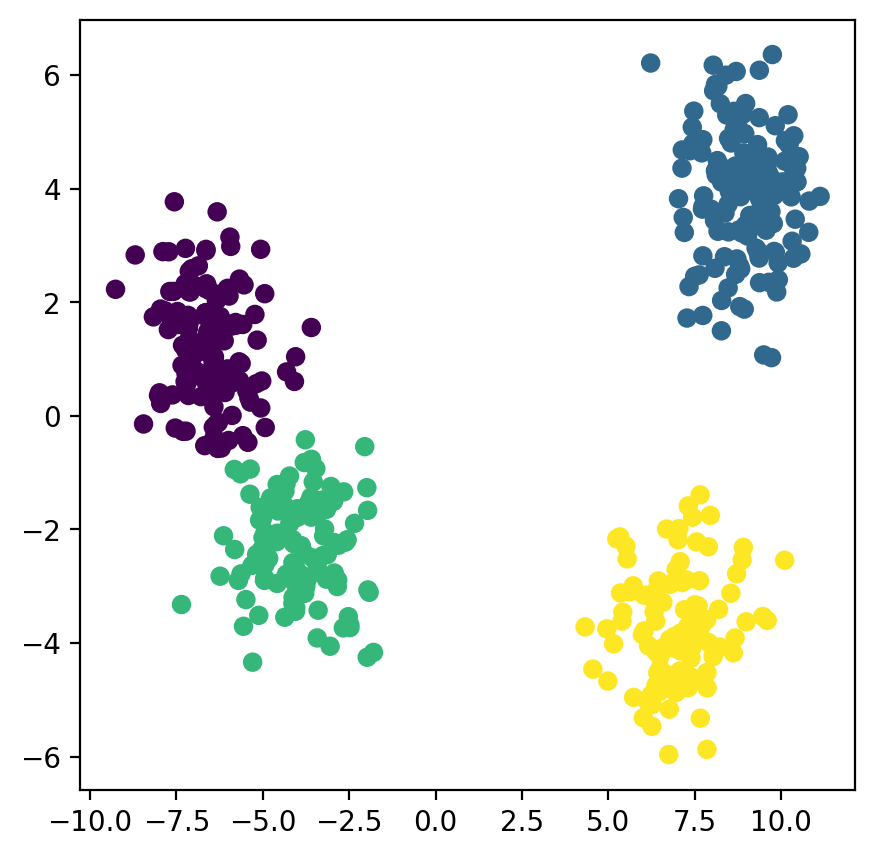

In [7]:
new = KMeans(4)
new.fit(t_clusters)


labels = new.predict(t_clusters)
plot_clusters(t_clusters,labels)

# print(labels)


In [6]:

import numpy as np

# Assuming `data` is your 2D array with shape (500, 2)
# data = np.array([...])  # Your 500 data points

# Determine the range of your data in each dimension
min_vals = np.min(t_clusters, axis=0)
max_vals = np.max(t_clusters, axis=0)

# Generate 3 random seed points
random_seeds = np.random.uniform(min_vals, max_vals, (3, t_clusters.shape[1]))

print(random_seeds)

[[ 2.69843905 -3.89290263]
 [ 5.7619914   4.66948293]
 [-4.8423049  -4.78391121]]


In [2]:
import numpy as np
import pytest
from cluster import silhouette  
from cluster import KMeans 
from sklearn.metrics import silhouette_score
from cluster.utils import (
        make_clusters, 
        plot_clusters,
        plot_multipanel)

In [4]:
X = np.array([[1, 2], [1, 4], [1, 0],
                  [10, 2], [10, 4], [10, 0]])
labels = np.array([0, 0, 0, 1, 1, 1])

expected_scores = np.array([0.85422257, 0.7862365,  0.7862365,  0.85422257 ,0.7862365 , 0.7862365 ]) 
calculated_scores = silhouette.Silhouette()
# Calculate silhouette scores
calculated_scores.score(X = X, y = labels)
print(calculated_scores.outscore)


[0.85422257 0.7862365  0.7862365  0.85422257 0.7862365  0.7862365 ]


In [5]:
t_clusters, t_labels = make_clusters(k=4)
new = KMeans(4)
new.fit(t_clusters)
labels = new.predict(t_clusters)

calculated_scores = silhouette.Silhouette()
    # Calculate silhouette scores
calculated_scores.score(X = t_clusters, y = labels)
sci_score = silhouette_score(t_clusters, labels)

print(sci_score)

r [[ 1.03706781e+01 -4.34700362e-03]
 [ 7.17115974e+00  8.17416976e-01]
 [-8.37603639e+00  1.83936848e+00]
 [ 1.01357406e+01  1.45068038e+00]] [[ 1.03706781e+01 -4.34700362e-03]
 [ 7.17115974e+00  8.17416976e-01]
 [-8.37603639e+00  1.83936848e+00]
 [ 1.01357406e+01  1.45068038e+00]]
0.6517125520324651
